# 2950 Project Phase IV

# Introduction

What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.<br>

This project aims to analyze a dataset of data from the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and the United Nations. Together, these organizations track health, economic, and social factors for all countries.<br>

Our two research questions are:<br>
1. How does the average education level of a country affect the country's holistic health?
2. How does a country's government spending play into the the average life expectancy of its citizens?

Our main findings include:
- a strong exponential decay relationship between the percent of citizens with HIV or AIDs and average years of schooling
- percentage expenditure on health, income composition of resources, and gdp as strong predictors of life expectancy in a multiple linear regression
- a single linear regression between ...

# Data Description
**What are the observations (rows) and the attributes (columns)?**

The rows of the data set are countries and the columns of the data set are: country (country name), year (year this data was collected), status (developed or developing country), life_expectancy (average life expectancy in age), adult_mortality (probability of dying between 15 and 60 years per 1000 population), infant_deaths (number of infant deaths per 1000 population), alcohol (alcohol consumption recorded per capita (in litres of pure alcohol)), percent_expenditure (expenditure on health as a percentage of GDP per capita), hepitatis_b (Hepatitis B immunization coverage among 1-year-olds as a percentage), measles (number of reported cases per 1000 population), BMI (average Body Mass Index), under_five_deaths (number of under-five deaths per 1000 population), polio (Polio immunization coverage among 1-year-olds as a percentage), total_expenditure (general government expenditure on health as a percentage of total government expenditure), diphtheria (diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds as a percentage), hiv/aids (deaths per 1000 live births (0-4 years)), gdp (Gross Domestic Product per capita (in USD)), population, thinness__1-19_years (prevalence of thinness among children and adolescents for ages 10 to 19 as a percentage), thinness_5-9_years (prevalence of thinness among children for age 5 to 9 as a percentage), income_composition_of_resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)), schooling (average number of years of schooling).

**Why was this data set created?**

Both the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and the United Nations track health statistics as well as many other related factors (economic, social, etc.) for all countries. The creators of this data set combined the data from the repository with that of the UN. They observed that in the past 15 years, there have been significant developments in the health sector specifically in terms of decreasing human mortality rates. They created this data set to compare this decreasing mortality rate to a number of other economic, social, and medical factors to analyze how they contribute.

**Who funded the creation of the data set?**

This project was funded by the Industrial Engineering Department at Georgia Institute of Technology.

**What processes might have influenced what data was observed and recorded and what was not?**

In terms of the WHO collecting data, it is possible that more developed countries have more resources and are thus more likely to have more data. With this said, in order to compare each country equitably, the data collectors must collect the same data across all countries. This means that it is possible that the data collection was limited by what data variables were available across every country.

In terms of the creation of the actual data set, the creators mentioned a few factors they used to limit the data set: The creators of this data set noted that there were certain countries originally in this data set that had lots of missing data (they noted lesser known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.). They shared that finding the data for these countries was difficult, so they decided to exclude the countries from the final data set of 193 countries. The creators also noted that “among all categories of health-related factors only those critical factors were chosen which are more representative”. This means that they omitted other factors that they deemed less important or less correlated to the data set.

How they data cleaned: Of all health related categories in the WHO data set, only the critical factors (those with high correlations to mortality rates) were chosen to be included. The creators combined these data sets for the years 2000-2015 for 193 countries using the merge function. To account for the missing values, the developers handled it in R software by using the Missmap command.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The preprocessing done by the creators of the data set are outlined in two questions above. The preprocessing we did was outlined in the jupyter notebook data cleaning file.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

The WHO notes that all of their data sets "represent the best estimates using methodologies for specific indicators that aim for comparability across countries and time; they are updated as more recent or revised data become available, or when there are changes to the methodology being used". The people involved in the data collection are aware of their data being collected and understand the WHOs intent to utilize their data to analyze global health trends to serve the greater health of humanity.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

https://drive.google.com/file/d/1uWotsPMAGiU_x2lEgssgJe6DtITk4r1I/view?usp=sharing


# Pre-Registration Statement
The two analyses we would like to preregister are:

1. Single exponential decay regression with HIV/AIDS to predict average years of schooling
2. Multiple linear regression with percentage expenditure, income composition of resources, and GDP on life expectancy

# Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = pd.read_csv('WHOcleaner.csv')

**Exponential Decay Regression: HIV/AIDs and Schooling**

Coefficient:-0.0139.
Intercept: 2.4850.
r^2: 0.0528.


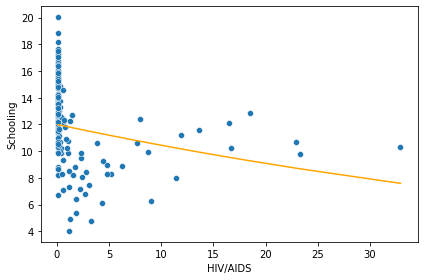

In [3]:
#transform output variable
x='hiv/aids'
y= 'schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, y="schooling", x='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.ylabel('Schooling')
plt.xlabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

We originally preregistered that we think HIV/AIDs could predict schooling with an exponential decay model. After running this model and graphic it above, we notice that it seems a bit off. Reflecting on our previous thoughts, we realize that we were thinking more along the lines of the inverse relationship, where the amount of schooling predicts the prevelance of HIV/AIDs in a country with a exponential decay model. Thus, to see if this is true, we will run the same model with the x and y axes flipped below.

Coefficient:-0.3130.
Intercept: 2.6674.
r^2: 0.3418.


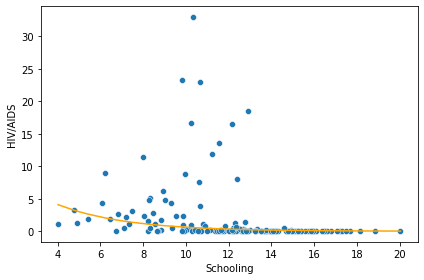

In [4]:
#transform output variable
y='hiv/aids'
x='schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, x="schooling", y='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.xlabel('Schooling')
plt.ylabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

**Interpretation and Conclusions:**

As seen above, this inversion of the axes definitely fits the exponential decay model more. However, the model does not seem too predictive. The r-squared value of 0.3418 is relatively low, implying that this model is not a great way to accurately predict HIV/AIDs rates from schooling years. 

After graphing the scatter plot and model line above, it appears that there is a lot of data near the center of the schooling axis that has a lot high rates of HIV/AIDs, even more so than countries that have the lowest amounts of schooling. This data has an interesting plot, but does not seem to accurately fit the exponential decay model. Countries with many years of schooling have an HIV/AIDs rate that approaches 0.00, following the exponential decay model. However, majority of countries with less than 14 years of schooling have HIV/AIDs rates that are understated by the model compared to the actual values. 

Overall, our original hypothesis that schooling has a high predictive value for HIV/AIDs seems to be inconclusive, as the exponential decay model did not fit as well as intended, and the scatterplot has an interesting shape that likely would not match other models as well.

# Single Linear Regression: Income Composition of Resources

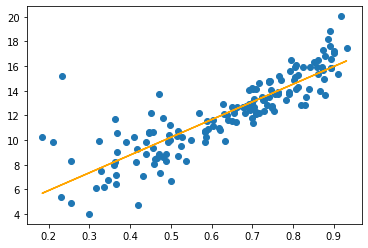

r^2:  0.7395.


In [5]:
school_model = LinearRegression()
school_model.fit(df[['income_composition_of_resources']], df['schooling'])
plt.scatter(df.income_composition_of_resources, df.schooling)
plt.plot(df.income_composition_of_resources, school_model.predict(df[['income_composition_of_resources']]), c='orange')
plt.show()
print(f"r^2: {school_model.score(df[['income_composition_of_resources']], df['schooling']): 0.4f}.")

**Multiple Linear Regression: percentage expenditure on health, income composition of resources, and gdp as predictors of life expectancy**

In [6]:
multireg= LinearRegression().fit(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
multi= multireg.score(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
print(f"r^2: {multi:0.4f}.")


r^2: 0.6779.


**Interpretation and Conclusions**
KATES SHIT HERE

# Evaluation of Significance
**Bootstrapping Hypothesis Test on Multiple Linear Regression**

Observed slope:  0.00041322091464671997
Bootstrapped CI: [-0.00088429  0.00139061]


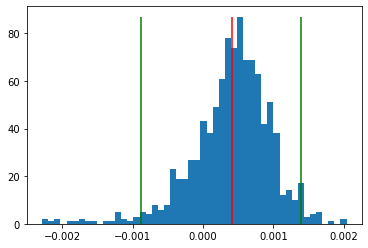

In [7]:
real_slope = multireg.coef_[0]
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    resampled_data = df.sample(n=len(df), replace=True)
    resampled_model = LinearRegression().fit(resampled_data[["percentage_expenditure", "income_composition_of_resources", "gdp"]], resampled_data["life_expectancy"])
    
    bootstrap_slopes[i] = resampled_model.coef_[0]
    
print(f'Observed slope:  {real_slope}')
print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.975])}')

binsizes, _, _ = plt.hist(bootstrap_slopes, bins=50)
plt.vlines(real_slope, ymin=0, ymax=np.max(binsizes), color='red')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.show()

**Interpretation and Conclusions**
KATES SHIT HERE

# Limitations 
What are the limitations of your study? What are the biases in your data or assumptions of your analyses that specifically affect the conclusions you're able to draw?<br>

Limitations: only 173 countries; could use variables on some rating of the quality of schooling and the number of hospitals per capita; MORE FROM MIL? <br>

Biases: TALK ABOUT THIS WITH MIL <br>

# Source Code

Github link: https://github.com/milan-patlikh/info-2950

# Acknowledgments

Software Packages: Pandas, Numpy, Matplotlib, Seaborn<br>

Homework 6 question 4 solutions from Maria (TA)<br>
Homeworks 4-7<br>
Lectures 10-19<br>

Dataset Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who <br>

Original Data Sources: Global Health Observatory (GHO) data repository under the World Health Organization (WHO); the United Nations data repository<br>

Consulted with TAs Maria and Sam in office hours.<br>

We did not consult any stack overflow questions, other classes, or people outside of each other, Sam, and Maria.

Additional sources used to aid the writing of conclusions: <br>
https://towardsdatascience.com/how-different-factors-have-an-influence-on-your-life-expectancy-7b807b04f33e <br>